# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = '/home/nlplab/patina/4th-ML100days/data'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
app_train.shape

(307511, 122)

In [5]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


### 基本資料探索

In [6]:
app_train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [7]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [8]:
app_train.apply(pd.Series.nunique, axis=0)

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        25
Length: 122, dtype: int64

In [9]:
app_train.select_dtypes('int64').apply(pd.Series.nunique, axis=0)

SK_ID_CURR                     307511
TARGET                              2
CNT_CHILDREN                       15
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMEN

### [groupby] 各性別的平均年收入

In [10]:
app_train['AMT_INCOME_TOTAL'].groupby(app_train['CODE_GENDER']).mean()

CODE_GENDER
F      156032.309247
M      193396.482153
XNA    186750.000000
Name: AMT_INCOME_TOTAL, dtype: float64

### [crosstab] 各性別傾向 cross CONTRACT_TYPE 的結果

In [11]:
pd.crosstab(app_train['CODE_GENDER'], app_train['NAME_CONTRACT_TYPE'], rownames=['CODE_GENDER'], colnames=['NAME_CONTRACT_TYPE'])

NAME_CONTRACT_TYPE,Cash loans,Revolving loans
CODE_GENDER,,
F,182800,19648
M,95432,9627
XNA,0,4


### [crosstab] 練習

In [12]:
tips = pd.read_csv('tips.csv')
party_counts = pd.crosstab(tips.day, tips.size)
party_counts

col_0,1708
day,
Fri,19
Sat,87
Sun,76
Thur,62


### histogram 練習

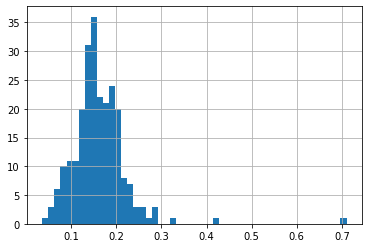

In [14]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].hist(bins=50)

In [15]:
tips['tip_pct'].groupby(pd.cut(tips['tip_pct'], 50)).count()

tip_pct
(0.035, 0.0491]      1
(0.0491, 0.0626]     3
(0.0626, 0.0761]     6
(0.0761, 0.0896]    10
(0.0896, 0.103]     11
(0.103, 0.117]      11
(0.117, 0.13]       20
(0.13, 0.144]       31
(0.144, 0.157]      36
(0.157, 0.171]      22
(0.171, 0.184]      21
(0.184, 0.198]      24
(0.198, 0.211]      20
(0.211, 0.225]       8
(0.225, 0.238]       7
(0.238, 0.252]       3
(0.252, 0.265]       3
(0.265, 0.279]       1
(0.279, 0.292]       3
(0.292, 0.306]       0
(0.306, 0.319]       0
(0.319, 0.333]       1
(0.333, 0.346]       0
(0.346, 0.359]       0
(0.359, 0.373]       0
(0.373, 0.386]       0
(0.386, 0.4]         0
(0.4, 0.413]         0
(0.413, 0.427]       1
(0.427, 0.44]        0
(0.44, 0.454]        0
(0.454, 0.467]       0
(0.467, 0.481]       0
(0.481, 0.494]       0
(0.494, 0.508]       0
(0.508, 0.521]       0
(0.521, 0.535]       0
(0.535, 0.548]       0
(0.548, 0.562]       0
(0.562, 0.575]       0
(0.575, 0.589]       0
(0.589, 0.602]       0
(0.602, 0.616]       0
(0.

In [16]:
s = pd.Series(app_train['AMT_INCOME_TOTAL'])

In [17]:
s.groupby(pd.cut(s, 10)).count()
# 懷疑是 outlier...

AMT_INCOME_TOTAL
(-91324.35, 11723085.0]       307508
(11723085.0, 23420520.0]           2
(23420520.0, 35117955.0]           0
(35117955.0, 46815390.0]           0
(46815390.0, 58512825.0]           0
(58512825.0, 70210260.0]           0
(70210260.0, 81907695.0]           0
(81907695.0, 93605130.0]           0
(93605130.0, 105302565.0]          0
(105302565.0, 117000000.0]         1
Name: AMT_INCOME_TOTAL, dtype: int64

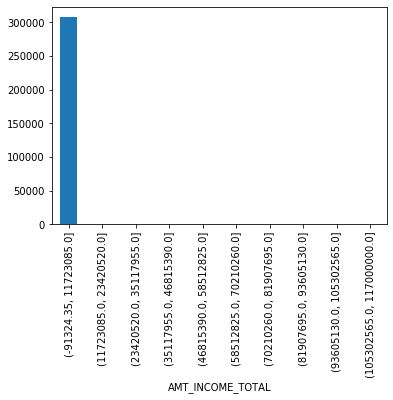

In [18]:
s.groupby(pd.cut(s, 10)).count().plot(kind='bar')

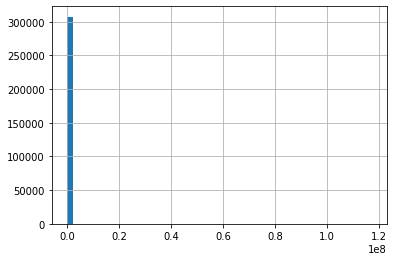

In [19]:
s.hist(bins=50)

### 其他 plotting 練習

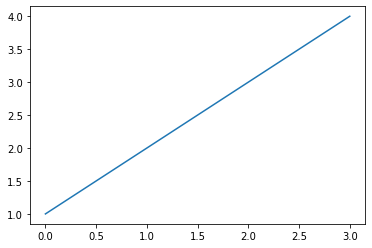

In [8]:
plt.plot([1, 2, 3, 4])

In [11]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
print(s)

0     1.426012
10    1.742254
20    2.206280
30    1.768649
40    2.160951
50    0.714607
60   -0.446815
70    0.404169
80   -0.097626
90   -0.439962
dtype: float64


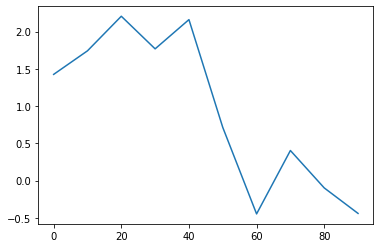

In [12]:
# plot series 的時候會把 index 當成 x_axis; value 當成 y_axis
s.plot()

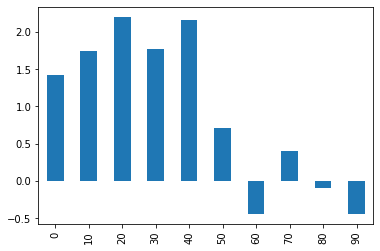

In [13]:
s.plot(kind='bar')

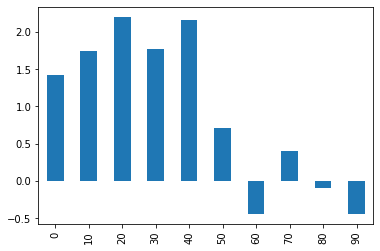

In [14]:
s.plot.bar()

In [20]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns=['A', 'B', 'C', 'D'], index=np.arange(0, 100, 10))
df

,A,B,C,D
0,0.553351,-0.749748,0.146837,-0.977942
10,1.522495,-2.307153,-1.210662,-1.674183
20,1.512761,-0.436968,-0.765964,-1.817971
30,2.458756,0.477182,0.287662,-2.242094
40,0.772759,2.619477,-0.371630,-4.616794
50,0.118693,3.422820,-2.233775,-5.516012
60,0.179081,2.515750,-2.736927,-5.200906
70,1.273849,1.869821,-2.345867,-5.032979
80,0.809280,2.606182,-2.704758,-3.681236
90,0.923028,4.323544,-0.950849,-2.311861


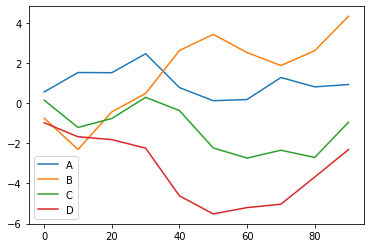

In [21]:
df.plot()

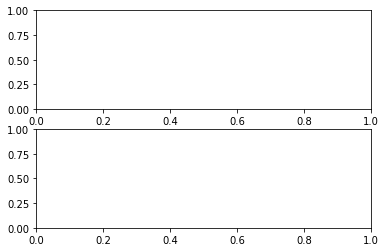

In [18]:
fig, axes = plt.subplots(2, 1)

In [16]:
data = pd.Series(np.random.randn(16), index=list('abcdefghijklmnop'))
data

a    0.898606
b    1.014858
c   -0.488916
d    0.895118
e    0.066418
f   -0.219341
g    0.197929
h    1.219283
i   -0.582540
j   -1.193050
k   -0.602818
l   -0.811142
m    0.568896
n   -0.491557
o   -1.053444
p    0.834145
dtype: float64

In [34]:
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
plt.show()

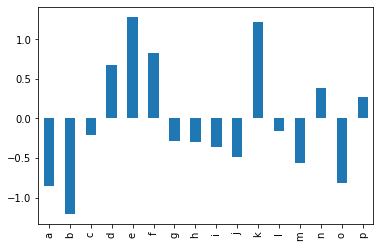

In [37]:
data.plot(kind='bar')
plt.show()

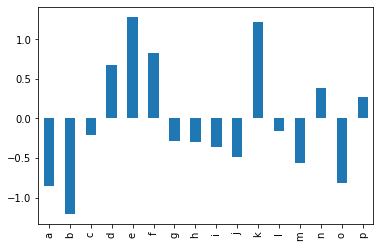

In [35]:
data.plot(kind='bar')
plt.show()

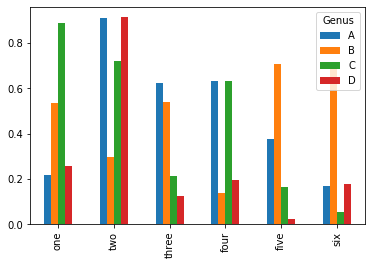

In [19]:
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)    # 如下图1(Series)
df = pd.DataFrame(np.random.rand(6, 4), index=['one', 'two', 'three', 'four', 'five', 'six'], columns=pd.Index(['A', 'B', 'C', 'D'], name="Genus"))
df.plot(kind='bar')    # 如下图2(DF)

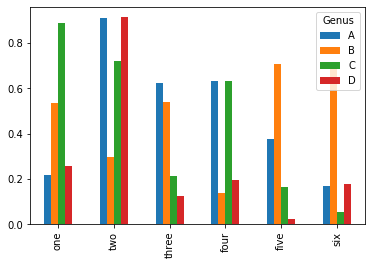

In [20]:
df.plot.bar()